# DSC 783-001-Advanced Business Analytics
# Final Project
# Fall 2024
# Professor: Yifan Xie, Ph.D.
# Team: Micheal Chite, Julian Mella, A B M Ahsan

EDA

In [ ]:
# Import libraries and datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train_data = pd.read_csv(r'train.csv')
test_data = pd.read_csv(r'test.csv')
sample_submission = pd.read_csv(r'sample_submission.csv')

In [ ]:
test_data.columns

Index(['Customer_ID', 'Age', 'Gender', 'Marital_Status', 'Education_Level',
       'Occupation', 'Annual_Income', 'Credit_Score', 'Number_of_Dependents',
       'Loan_Amount', 'Loan_Term_Months', 'Loan_Purpose', 'Account_Balance',
       'Num_of_Credit_Cards', 'Payment_History', 'Years_at_Job',
       'Home_Ownership', 'City', 'State', 'Vehicle_Owned'],
      dtype='object')

In [ ]:
train_data.columns

Index(['Customer_ID', 'Age', 'Gender', 'Marital_Status', 'Education_Level',
       'Occupation', 'Annual_Income', 'Credit_Score', 'Number_of_Dependents',
       'Loan_Amount', 'Loan_Term_Months', 'Loan_Purpose', 'Account_Balance',
       'Num_of_Credit_Cards', 'Payment_History', 'Years_at_Job',
       'Home_Ownership', 'City', 'State', 'Vehicle_Owned', 'Default'],
      dtype='object')

In [ ]:
# Display dataset overview
print("Train Data Overview:\n", train_data.head())
print("Test Data Overview:\n", test_data.head())
print("\nTrain Shape:", train_data.shape)
print("Test Shape:", test_data.shape)

Train Data Overview:
    Customer_ID  Age  Gender Marital_Status Education_Level    Occupation  \
0         3846   43  Female         Single        Bachelor        Doctor   
1           37   47  Female       Divorced     High School  Tradesperson   
2         1032   35    Male       Divorced     High School        Lawyer   
3         3583   34    Male        Married     High School  Entrepreneur   
4         5562   49  Female        Widowed        Bachelor  Tradesperson   

   Annual_Income  Credit_Score  Number_of_Dependents  Loan_Amount  ...  \
0       46839.88           619                     0     31171.46  ...   
1       63331.01           621                     1     35794.36  ...   
2       57857.30           652                     1      1816.16  ...   
3       36037.95           524                     2     26376.90  ...   
4       76869.20           642                     1     17721.62  ...   

         Loan_Purpose Account_Balance  Num_of_Credit_Cards  Payment_History 

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           4800 non-null   int64  
 1   Age                   4800 non-null   int64  
 2   Gender                4800 non-null   object 
 3   Marital_Status        4800 non-null   object 
 4   Education_Level       4800 non-null   object 
 5   Occupation            4800 non-null   object 
 6   Annual_Income         4800 non-null   float64
 7   Credit_Score          4800 non-null   int64  
 8   Number_of_Dependents  4800 non-null   int64  
 9   Loan_Amount           4800 non-null   float64
 10  Loan_Term_Months      4800 non-null   int64  
 11  Loan_Purpose          4800 non-null   object 
 12  Account_Balance       4800 non-null   float64
 13  Num_of_Credit_Cards   4800 non-null   int64  
 14  Payment_History       4800 non-null   object 
 15  Years_at_Job         

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           1200 non-null   int64  
 1   Age                   1200 non-null   int64  
 2   Gender                1200 non-null   object 
 3   Marital_Status        1200 non-null   object 
 4   Education_Level       1200 non-null   object 
 5   Occupation            1200 non-null   object 
 6   Annual_Income         1200 non-null   float64
 7   Credit_Score          1200 non-null   int64  
 8   Number_of_Dependents  1200 non-null   int64  
 9   Loan_Amount           1200 non-null   float64
 10  Loan_Term_Months      1200 non-null   int64  
 11  Loan_Purpose          1200 non-null   object 
 12  Account_Balance       1200 non-null   float64
 13  Num_of_Credit_Cards   1200 non-null   int64  
 14  Payment_History       1200 non-null   object 
 15  Years_at_Job         

In [ ]:
# Check for missing values
print("\nMissing Values in Train Dataset:\n", train_data.isnull().sum())
print("\nMissing Values in Test Dataset:\n", test_data.isnull().sum())


Missing Values in Train Dataset:
 Customer_ID                0
Age                        0
Gender                     0
Marital_Status             0
Education_Level            0
Occupation                 0
Annual_Income              0
Credit_Score               0
Number_of_Dependents       0
Loan_Amount                0
Loan_Term_Months           0
Loan_Purpose               0
Account_Balance            0
Num_of_Credit_Cards        0
Payment_History            0
Years_at_Job               0
Home_Ownership             0
City                       0
State                      0
Vehicle_Owned           1481
Default                    0
dtype: int64

Missing Values in Test Dataset:
 Customer_ID               0
Age                       0
Gender                    0
Marital_Status            0
Education_Level           0
Occupation                0
Annual_Income             0
Credit_Score              0
Number_of_Dependents      0
Loan_Amount               0
Loan_Term_Months          0
L

In [ ]:
# Check for duplicate entries
print("\nDuplicate rows in Train Dataset:", train_data.duplicated().sum())
print("Duplicate rows in Test Dataset:", test_data.duplicated().sum())


Duplicate rows in Train Dataset: 0
Duplicate rows in Test Dataset: 0


In [ ]:
train_data['Default'].unique()

array([0, 1])

In [ ]:
# Data types and basic statistics
print("\nData Types:\n", train_data.dtypes)
print("\nStatistical Summary:\n", train_data.describe(include='all'))


Data Types:
 Customer_ID               int64
Age                       int64
Gender                   object
Marital_Status           object
Education_Level          object
Occupation               object
Annual_Income           float64
Credit_Score              int64
Number_of_Dependents      int64
Loan_Amount             float64
Loan_Term_Months          int64
Loan_Purpose             object
Account_Balance         float64
Num_of_Credit_Cards       int64
Payment_History          object
Years_at_Job              int64
Home_Ownership           object
City                     object
State                    object
Vehicle_Owned            object
Default                   int64
dtype: object

Statistical Summary:
         Customer_ID          Age  Gender Marital_Status Education_Level  \
count   4800.000000  4800.000000    4800           4800            4800   
unique          NaN          NaN       2              4               4   
top             NaN          NaN  Female        Marr

<ipython-input-32-a719e360bf0d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Default', data=train_data, palette='coolwarm')


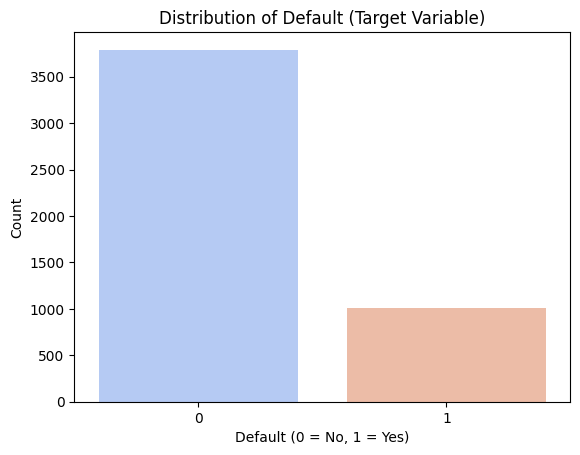

In [ ]:
# Target variable distribution
sns.countplot(x='Default', data=train_data, palette='coolwarm')
plt.title('Distribution of Default (Target Variable)')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

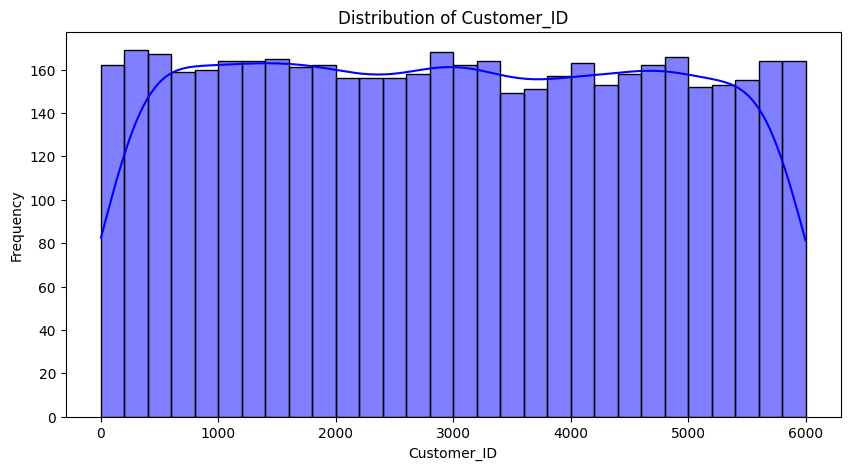

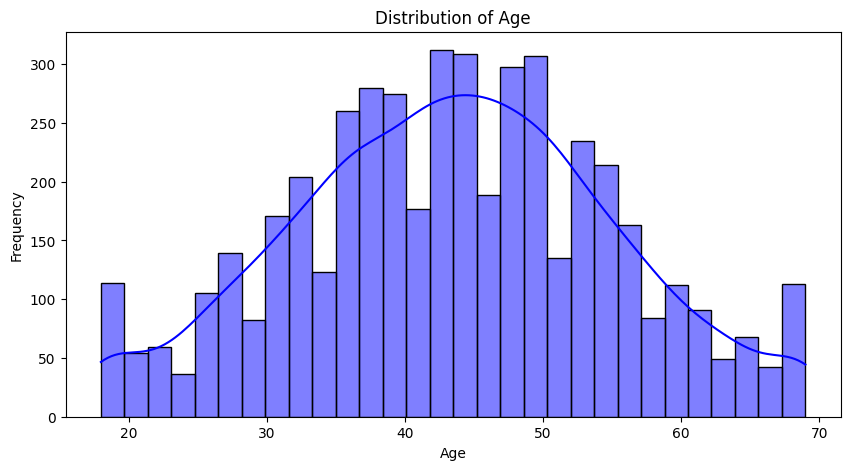

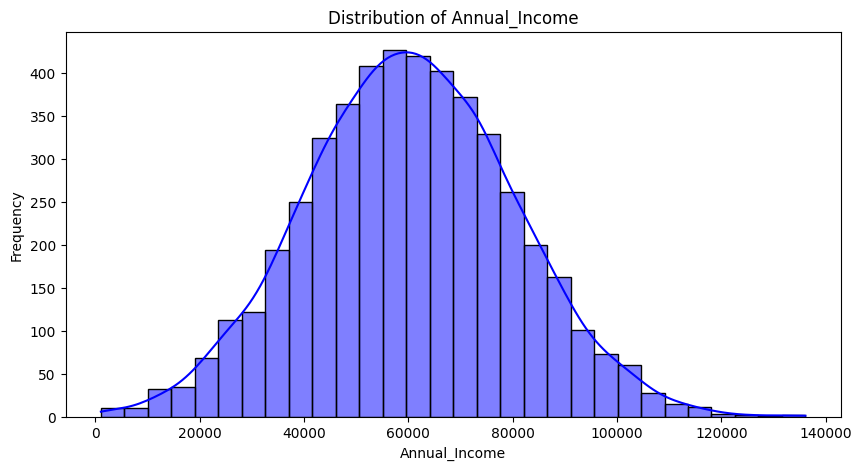

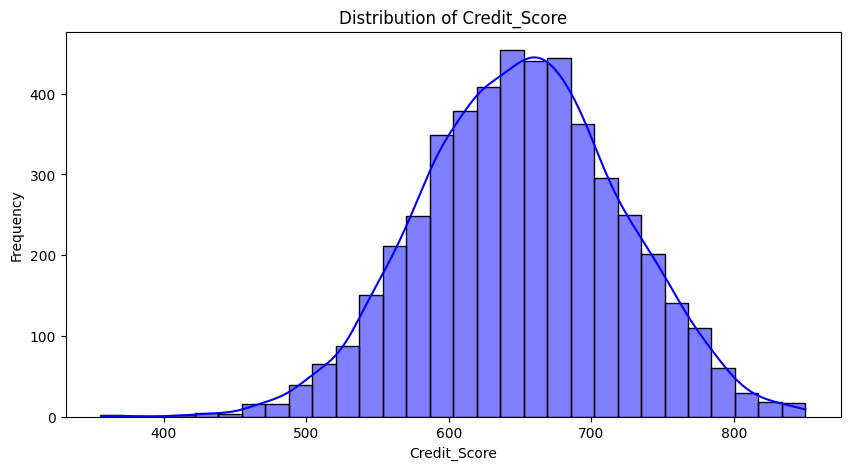

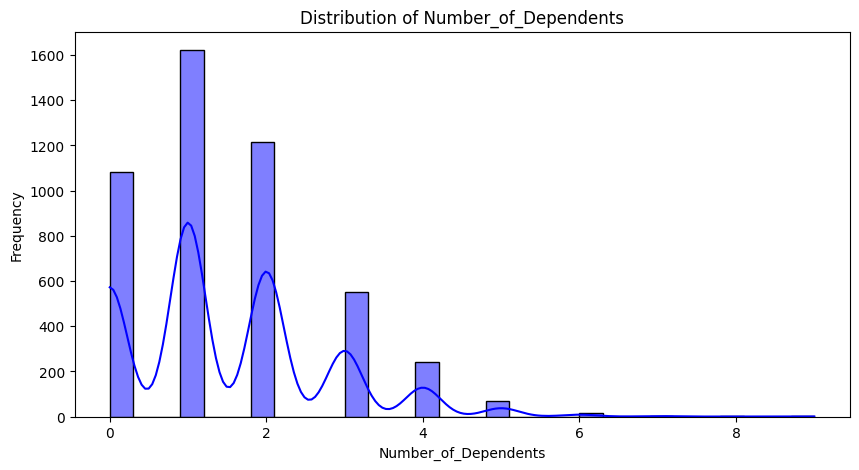

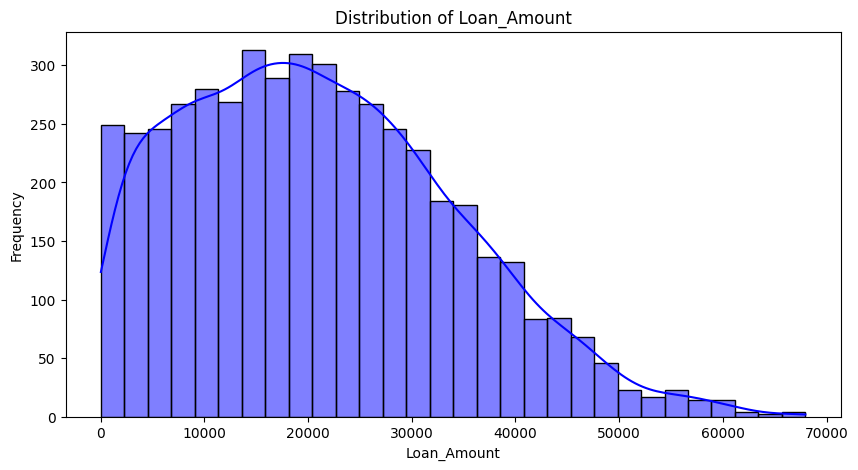

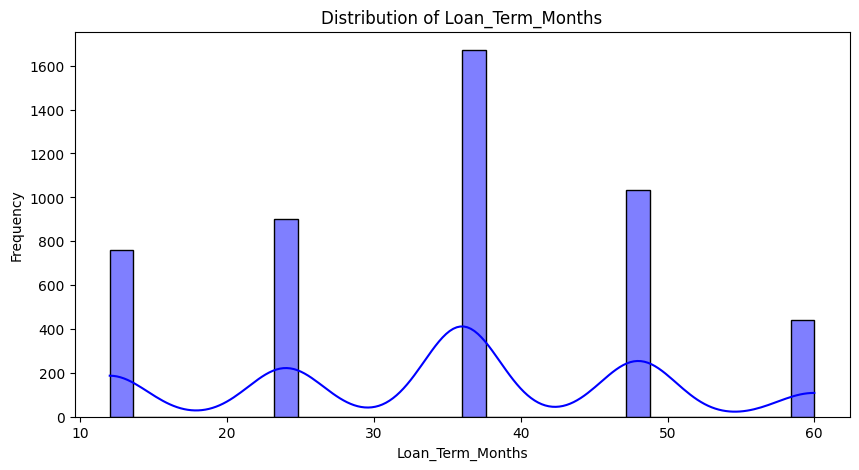

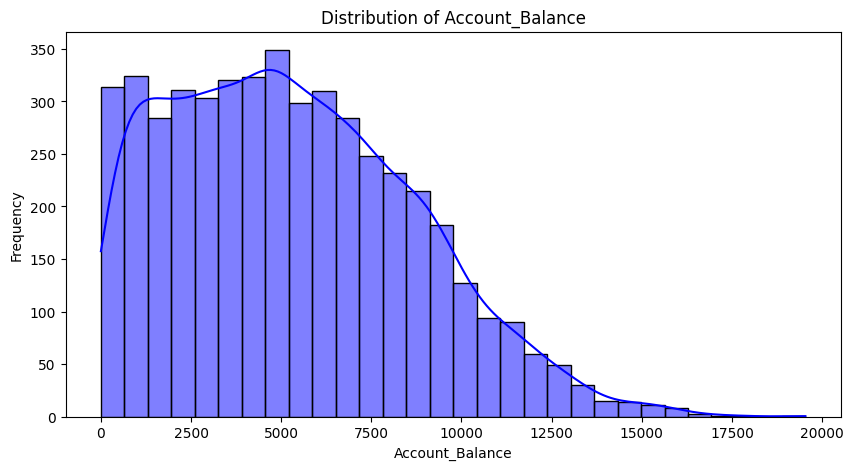

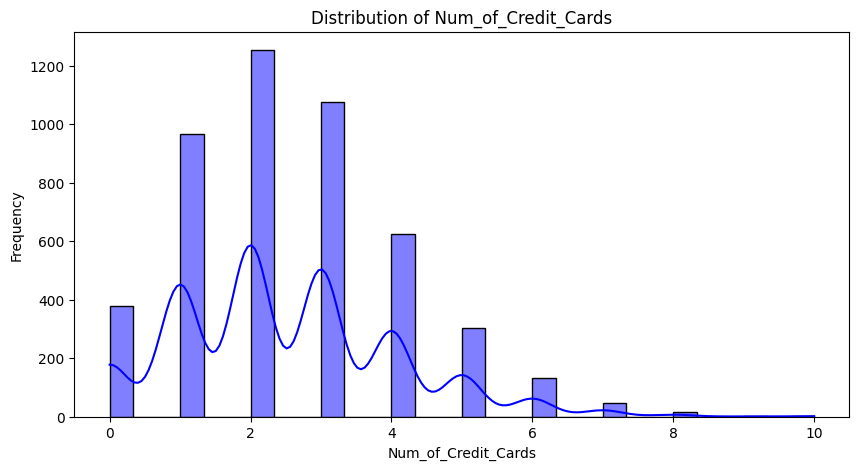

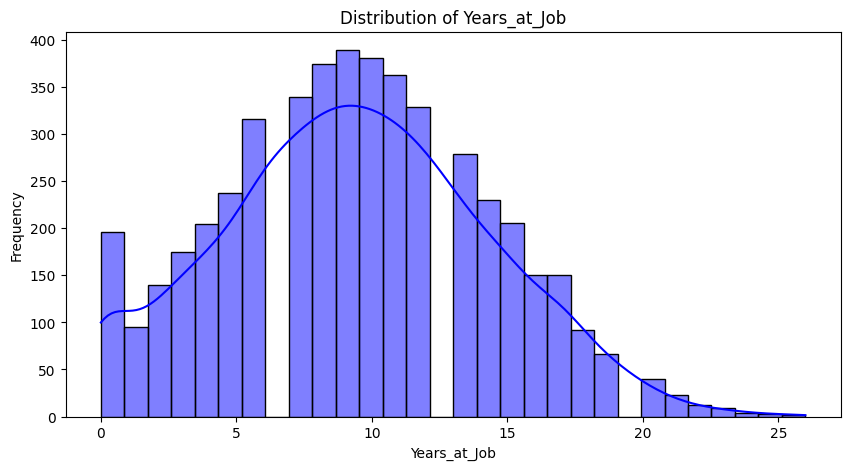

In [ ]:
# Univariate Analysis of Numerical Features
numerical_features = train_data.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('Default')  # Exclude target variable

for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(train_data[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

<ipython-input-12-b2e9c39b680e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df_train, palette='viridis')


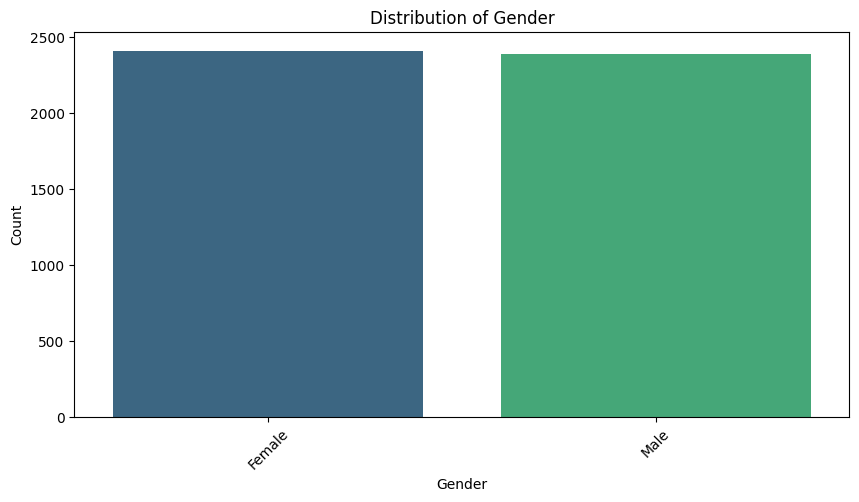

<ipython-input-12-b2e9c39b680e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df_train, palette='viridis')


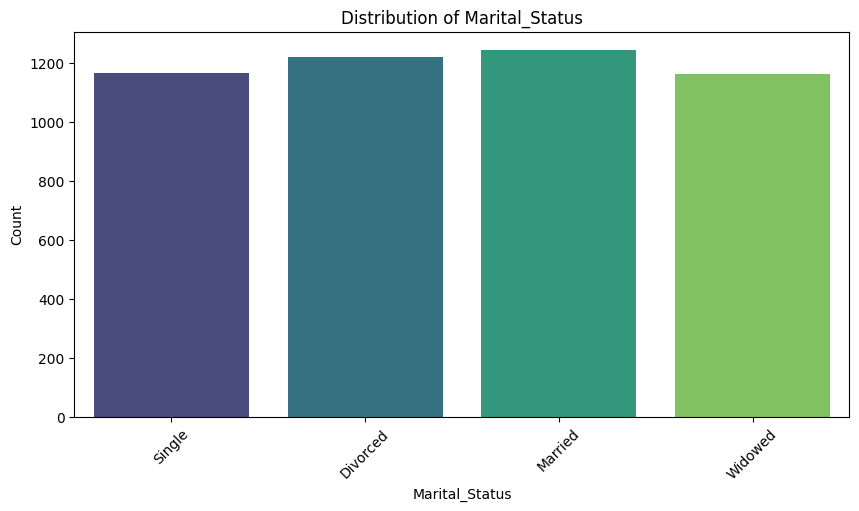

<ipython-input-12-b2e9c39b680e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df_train, palette='viridis')


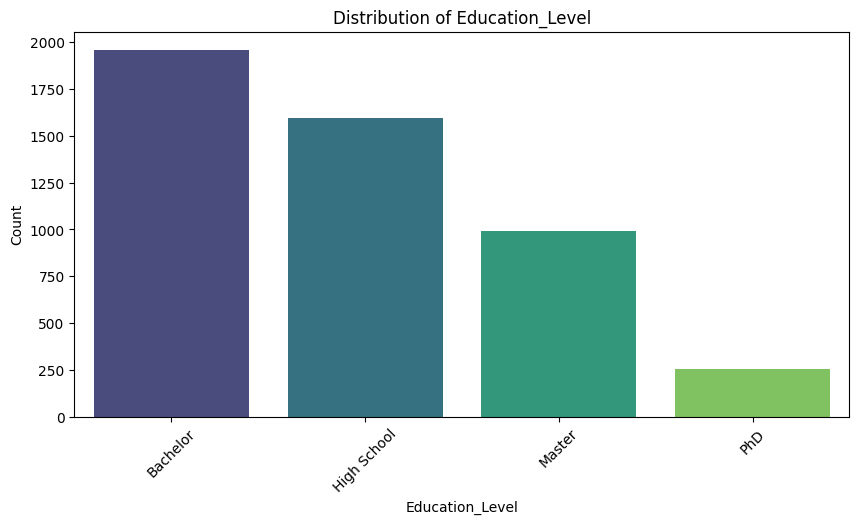

<ipython-input-12-b2e9c39b680e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df_train, palette='viridis')


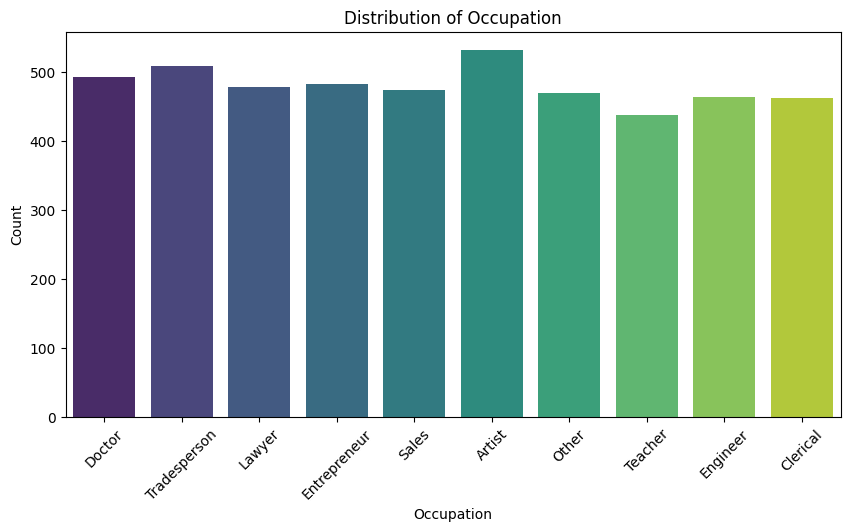

<ipython-input-12-b2e9c39b680e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df_train, palette='viridis')


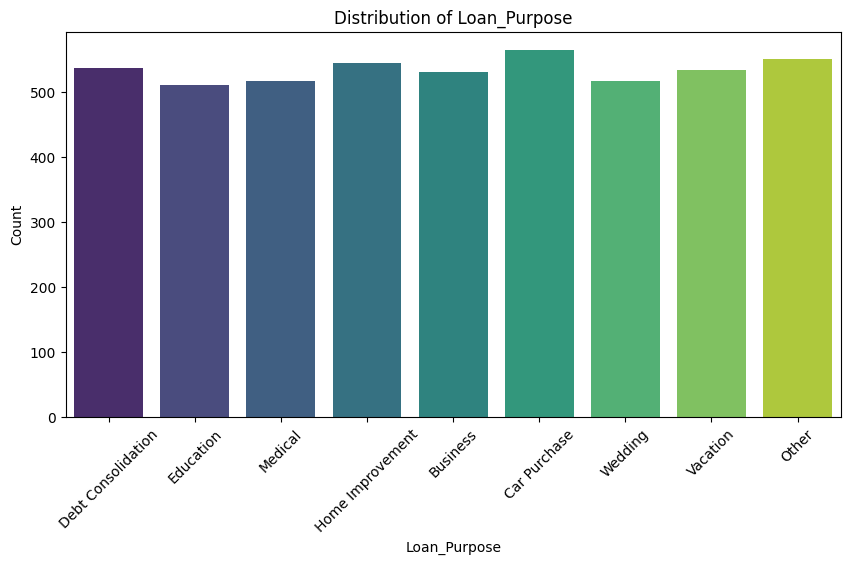

<ipython-input-12-b2e9c39b680e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df_train, palette='viridis')


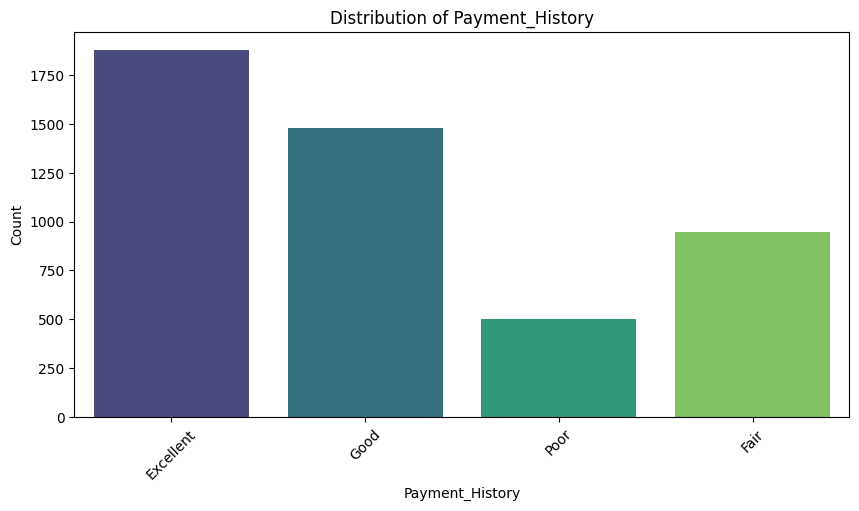

<ipython-input-12-b2e9c39b680e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df_train, palette='viridis')


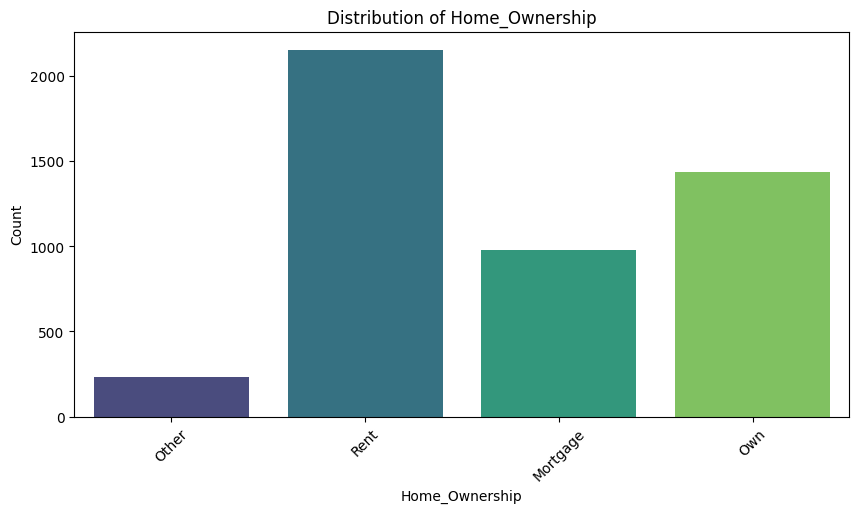

<ipython-input-12-b2e9c39b680e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df_train, palette='viridis')


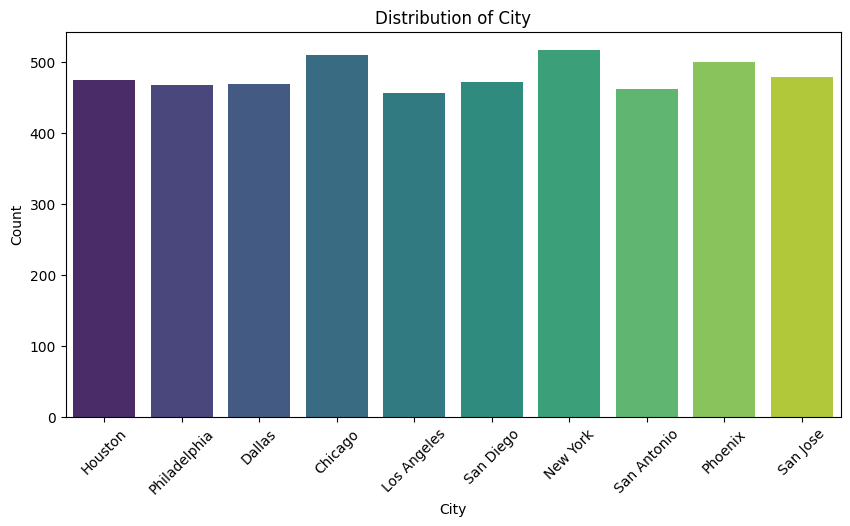

<ipython-input-12-b2e9c39b680e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df_train, palette='viridis')


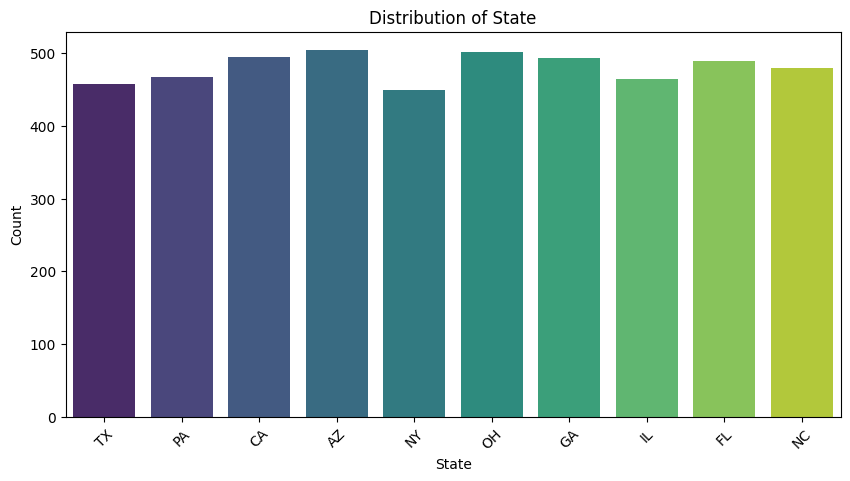

<ipython-input-12-b2e9c39b680e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df_train, palette='viridis')


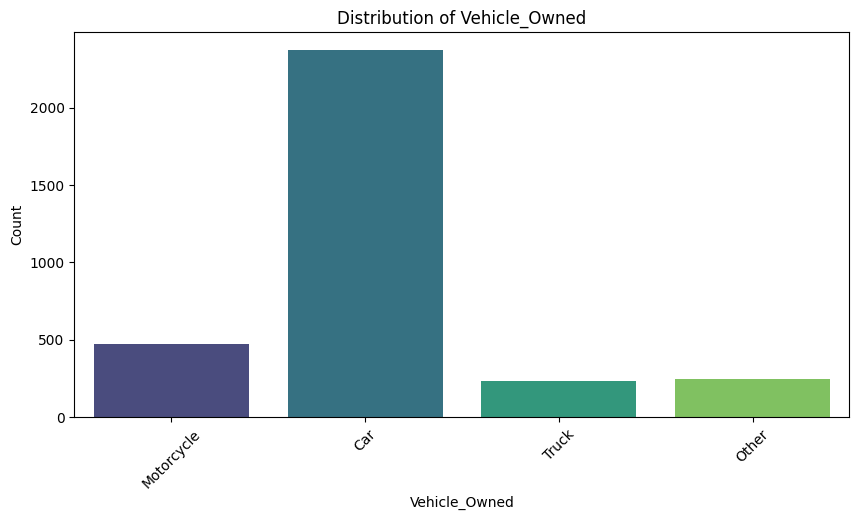

In [ ]:
# Categorical Features Analysis
categorical_features = df_train.select_dtypes(include=['object']).columns.tolist()

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, data=df_train, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


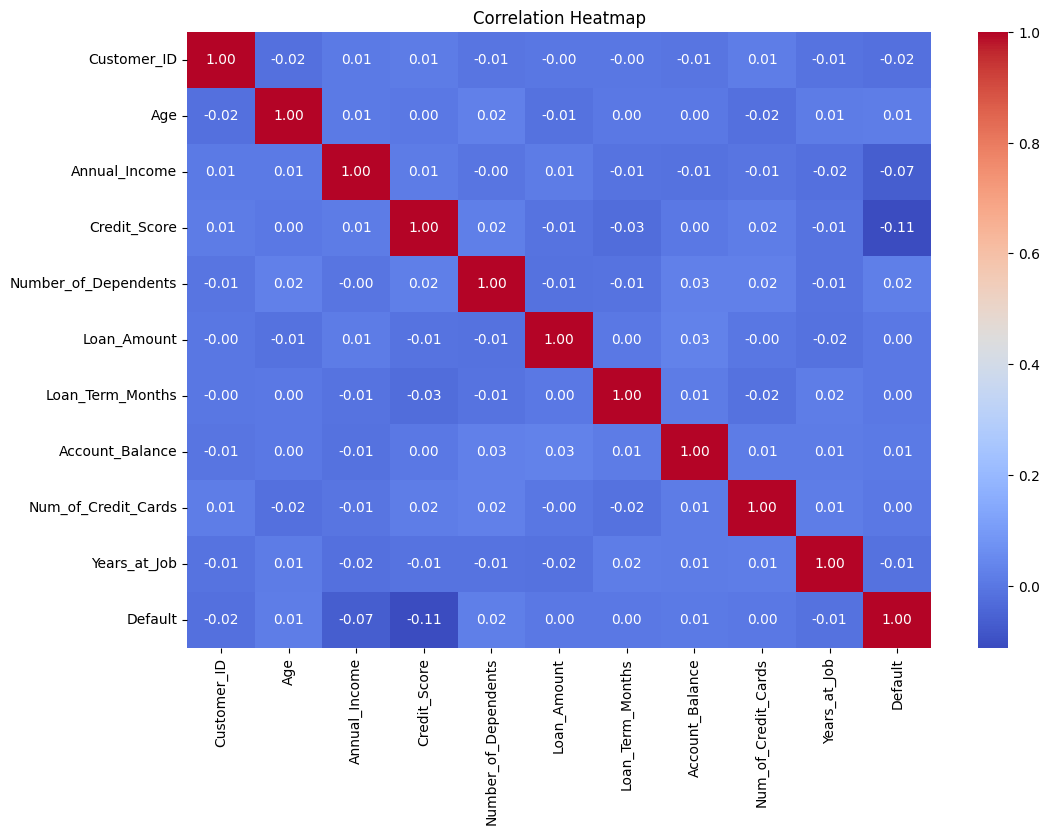

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))

# Select only numerical columns
numerical_data = train_data.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numerical_data.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


<ipython-input-35-3400018ea9a9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=feature, data=train_data, palette='coolwarm')


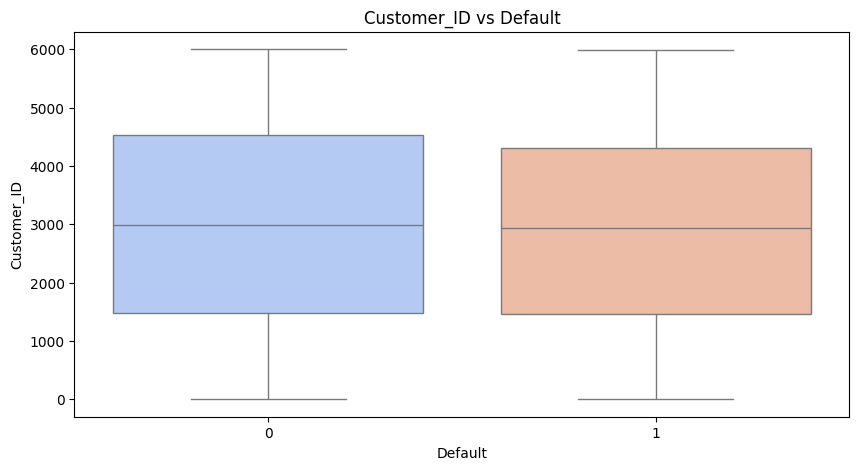

<ipython-input-35-3400018ea9a9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=feature, data=train_data, palette='coolwarm')


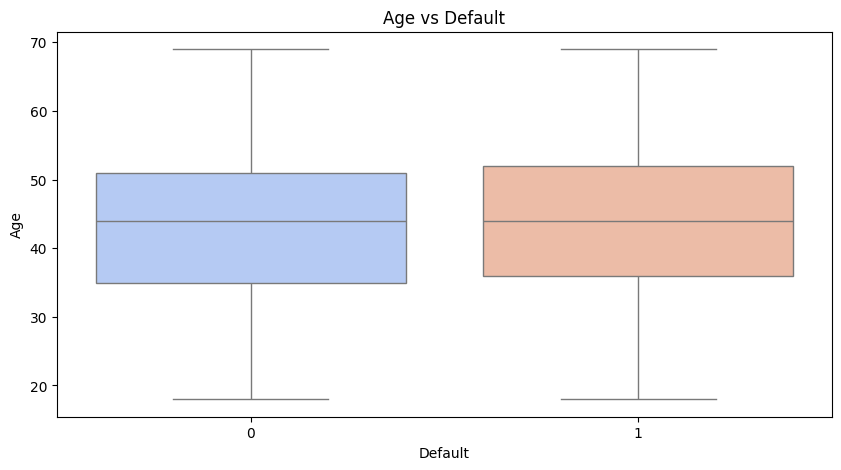

<ipython-input-35-3400018ea9a9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=feature, data=train_data, palette='coolwarm')


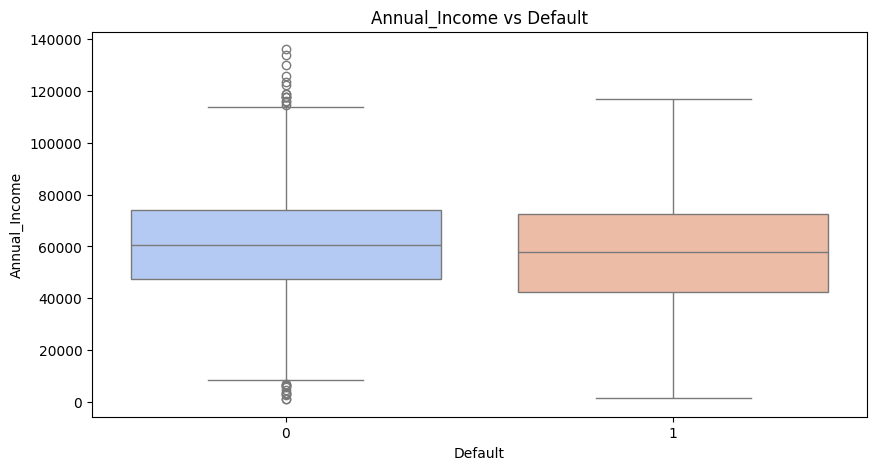

<ipython-input-35-3400018ea9a9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=feature, data=train_data, palette='coolwarm')


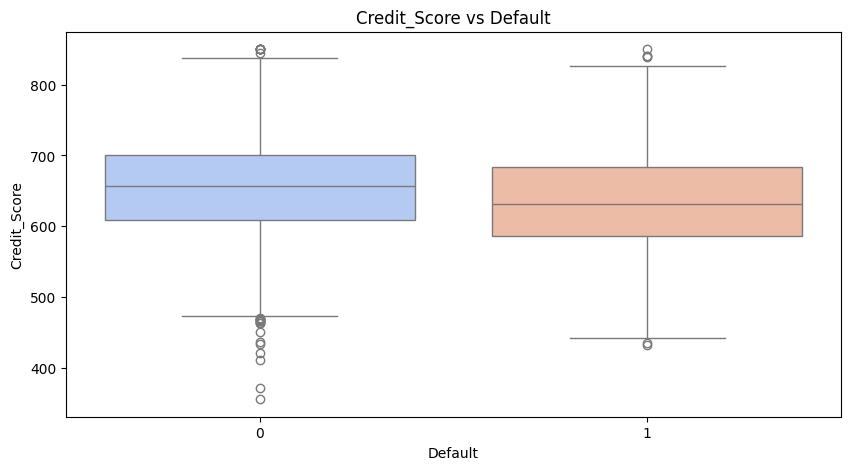

<ipython-input-35-3400018ea9a9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=feature, data=train_data, palette='coolwarm')


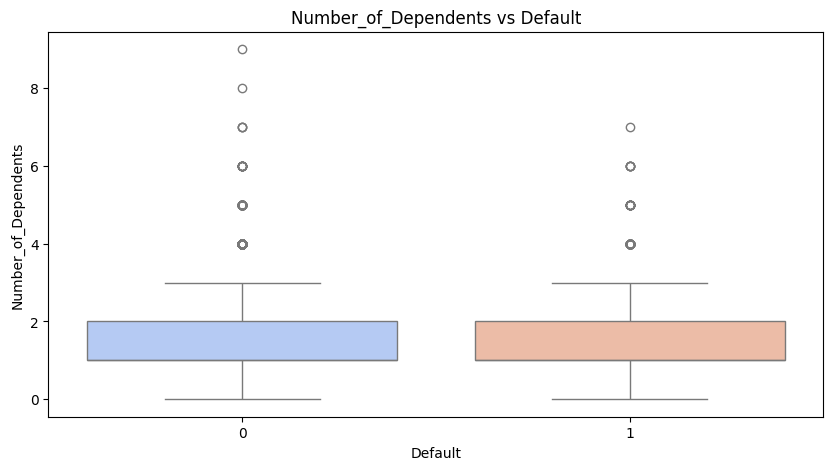

<ipython-input-35-3400018ea9a9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=feature, data=train_data, palette='coolwarm')


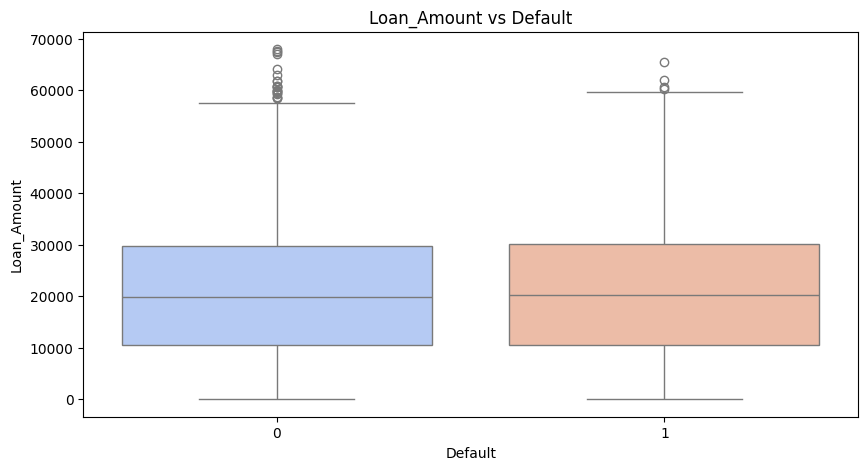

<ipython-input-35-3400018ea9a9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=feature, data=train_data, palette='coolwarm')


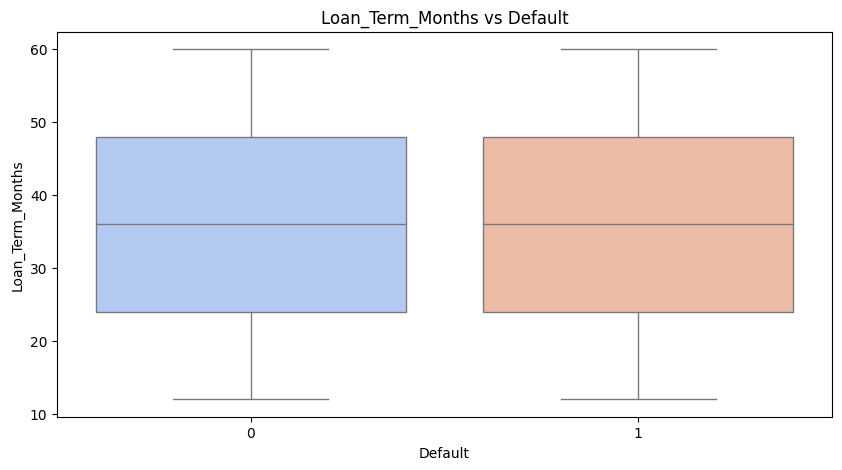

<ipython-input-35-3400018ea9a9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=feature, data=train_data, palette='coolwarm')


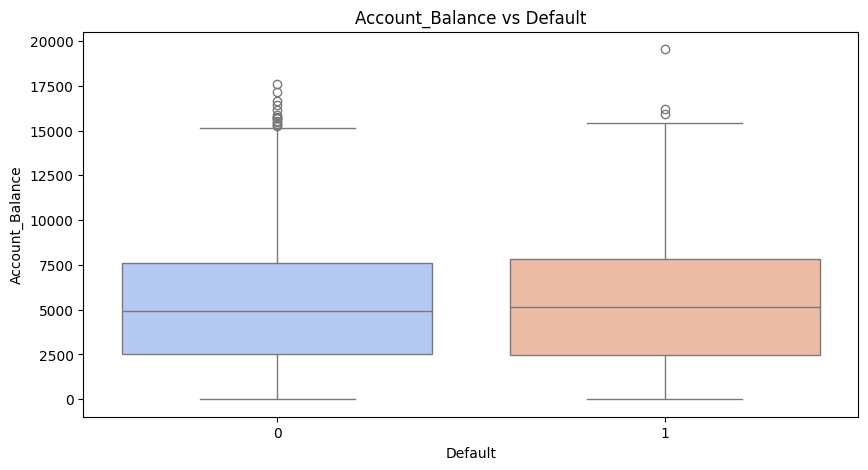

<ipython-input-35-3400018ea9a9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=feature, data=train_data, palette='coolwarm')


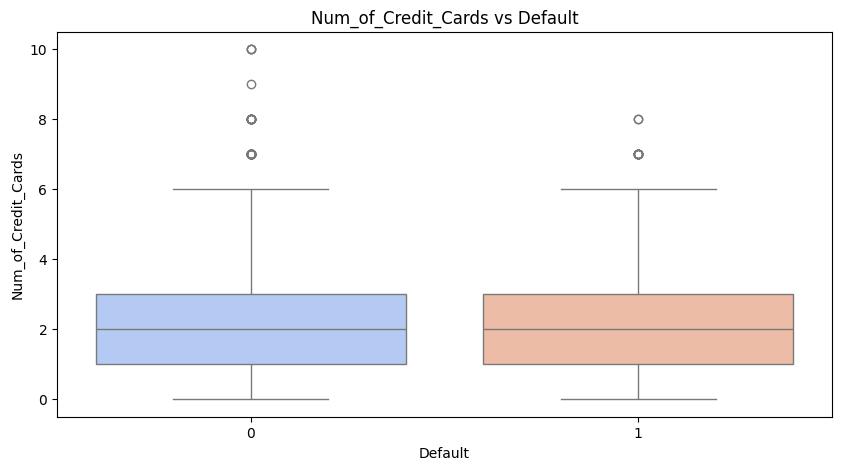

<ipython-input-35-3400018ea9a9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=feature, data=train_data, palette='coolwarm')


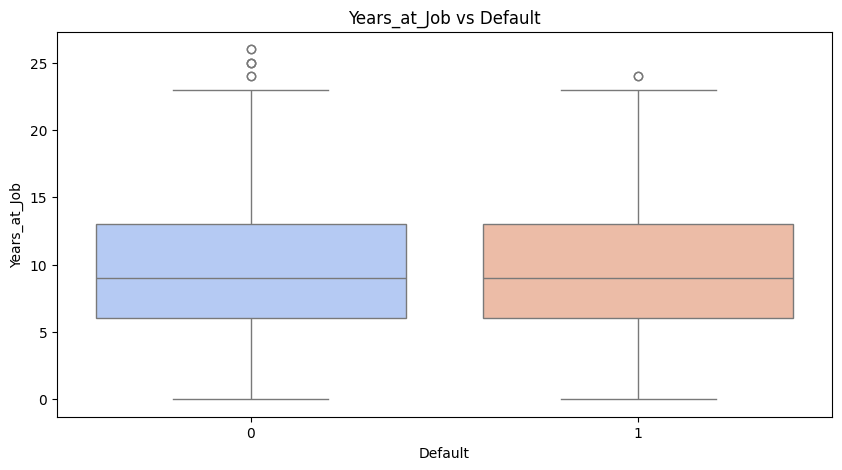

In [ ]:
# Analyze relationship between features and target variable
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Default', y=feature, data=train_data, palette='coolwarm')
    plt.title(f'{feature} vs Default')
    plt.xlabel('Default')
    plt.ylabel(feature)
    plt.show()

In [ ]:
# Check class imbalance
class_counts = train_data['Default'].value_counts()
print("\nClass Distribution:\n", class_counts)
print("Class Imbalance Ratio:", class_counts[1] / class_counts[0])


Class Distribution:
 Default
0    3790
1    1010
Name: count, dtype: int64
Class Imbalance Ratio: 0.26649076517150394


In [ ]:
# Handle missing values (initial exploration)

# Fill missing values for numerical columns
numerical_columns = train_data.select_dtypes(include=[np.number]).columns
train_data[numerical_columns] = train_data[numerical_columns].fillna(train_data[numerical_columns].median())

# Fill missing values for categorical columns
categorical_columns = train_data.select_dtypes(include=['object']).columns
train_data[categorical_columns] = train_data[categorical_columns].fillna(train_data[categorical_columns].mode().iloc[0])


In [ ]:
pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 5.0 MB/s eta 0:00:00


In [ ]:
pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 33.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

# Function to detect outliers using the IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return lower_bound, upper_bound, len(outliers), outliers

# Automatically select numerical columns (excluding 'Default')
numerical_columns_train = train_data.select_dtypes(include=['int64', 'float64']).columns.difference(['Default'])
numerical_columns_test = test_data.select_dtypes(include=['int64', 'float64']).columns

# Check for outliers in the train dataset
print("Checking outliers in the train dataset:")
for column in numerical_columns_train:
    lower, upper, outlier_count, outliers = detect_outliers(train_data, column)
    print(f"Column: {column}")
    print(f"Lower Bound: {lower}, Upper Bound: {upper}")
    print(f"Number of Outliers: {outlier_count}")
    print("-" * 50)

# Check for outliers in the test dataset
print("Checking outliers in the test dataset:")
for column in numerical_columns_test:
    lower, upper, outlier_count, outliers = detect_outliers(test_data, column)
    print(f"Column: {column}")
    print(f"Lower Bound: {lower}, Upper Bound: {upper}")
    print(f"Number of Outliers: {outlier_count}")
    print("-" * 50)


Checking outliers in the train dataset:
Column: Account_Balance
Lower Bound: -5064.2837500000005, Upper Bound: 15220.806250000001
Number of Outliers: 0
--------------------------------------------------
Column: Age
Lower Bound: 11.0, Upper Bound: 75.0
Number of Outliers: 0
--------------------------------------------------
Column: Annual_Income
Lower Bound: 6131.010000000017, Upper Bound: 114201.90999999997
Number of Outliers: 0
--------------------------------------------------
Column: Credit_Score
Lower Bound: 462.0, Upper Bound: 838.0
Number of Outliers: 0
--------------------------------------------------
Column: Loan_Amount
Lower Bound: -18272.273750000008, Upper Bound: 58721.036250000005
Number of Outliers: 0
--------------------------------------------------
Column: Loan_Term_Months
Lower Bound: -12.0, Upper Bound: 84.0
Number of Outliers: 0
--------------------------------------------------
Column: Num_of_Credit_Cards
Lower Bound: -2.0, Upper Bound: 6.0
Number of Outliers: 0
--

In [ ]:
# Apply capping and flooring to reduce the effect of outliers

# List of columns with outliers for train dataset
columns_with_outliers = ['Account_Balance', 'Annual_Income', 'Credit_Score',
                         'Loan_Amount', 'Num_of_Credit_Cards',
                         'Number_of_Dependents', 'Years_at_Job']

# List of columns with outliers for test dataset
columns_with_outliers_test = ['Account_Balance', 'Annual_Income', 'Credit_Score',
                              'Loan_Amount', 'Number_of_Dependents', 'Years_at_Job']

# Function to cap/floor outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap and floor outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

# Apply capping to train dataset
for column in columns_with_outliers:
    train_data = cap_outliers(train_data, column)

# Apply capping to test dataset
for column in columns_with_outliers_test:
    test_data = cap_outliers(test_data, column)


In [ ]:
# Summary
print("\nEDA completed. Next steps: Feature Engineering and Preprocessing.")



EDA completed. Next steps: Feature Engineering and Preprocessing.


Feature Engineering and Preprocessing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

#Loading datasets
train_data = pd.read_csv(r'train.csv')
test_data = pd.read_csv(r'test.csv')
sample_submission = pd.read_csv(r'sample_submission.csv')

In [ ]:
#Preprocessing
train_data = train_data.drop(columns=['Customer_ID'])
test_data_ids = test_data['Customer_ID']
test_data = test_data.drop(columns=['Customer_ID'])

In [ ]:
#Encoding categorical variables
categorical_columns = train_data.select_dtypes(include='object').columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])
    label_encoders[col] = le

Model Development

In [ ]:
# Model Random Forest

#Splitting train data into features/target
x = train_data.drop(columns=['Default'])
y = train_data['Default']

#Splitting into train/validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#Training Random Forest model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Evaluation on validation set
y_val_pred = model.predict(x_val)
validation_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {validation_accuracy:.2%}")

Validation Accuracy: 78.65%


In [ ]:
#Predictions for test set
test_predictions = model.predict(test_data)

In [ ]:
#Submission file
import os
submission = pd.DataFrame({
    'Customer_ID': test_data_ids,
    'Predicted_Label': test_predictions
})

submission_path = '/mnt/data/loan_default_submission.csv'

os.makedirs(os.path.dirname(submission_path), exist_ok=True)

submission.to_csv(submission_path, index=False)
print(f"Submission file saved to {submission_path}")

Submission file saved to /mnt/data/loan_default_submission.csv


In [ ]:
submission = pd.read_csv('/mnt/data/loan_default_submission.csv')
print(submission.head())


   Customer_ID  Predicted_Label
0         2357                0
1         3457                0
2         3653                0
3         3589                0
4          773                0


In [ ]:
from google.colab import files
files.download('/mnt/data/loan_default_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Validation Accuracy: 78.65%
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88       758
           1       0.00      0.00      0.00       202

    accuracy                           0.79       960
   macro avg       0.39      0.50      0.44       960
weighted avg       0.62      0.79      0.70       960



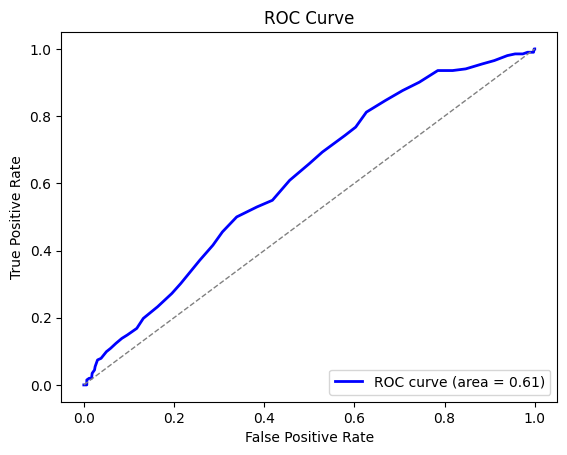

Predictions saved to submission.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Loading datasets
train_data = pd.read_csv(r'train.csv')
test_data = pd.read_csv(r'test.csv')
sample_submission = pd.read_csv(r'sample_submission.csv')

# Preprocessing
train_data = train_data.drop(columns=['Customer_ID'])
test_data_ids = test_data['Customer_ID']
test_data = test_data.drop(columns=['Customer_ID'])

# Encoding
categorical_columns = train_data.select_dtypes(include='object').columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])
    label_encoders[col] = le

# Splitting
x = train_data.drop(columns=['Default'])
y = train_data['Default']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Training model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(x_train, y_train)

# Evaluation
y_val_pred = model.predict(x_val)
y_val_prob = model.predict_proba(x_val)[:, 1]  # Probability estimates for ROC/AUC curve
validation_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {validation_accuracy:.2%}")

# Generate classification report
print("Classification Report for Random Forest:\n", classification_report(y_val, y_val_pred))

# ROC/AUC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Predictions
test_predictions = model.predict(test_data)

# Save predictions
sample_submission['Default'] = test_predictions
sample_submission.to_csv('submission.csv', index=False)
print("Predictions saved to submission.csv")


Validation Accuracy for SVM: 78.96%
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88       758
           1       0.00      0.00      0.00       202

    accuracy                           0.79       960
   macro avg       0.39      0.50      0.44       960
weighted avg       0.62      0.79      0.70       960



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


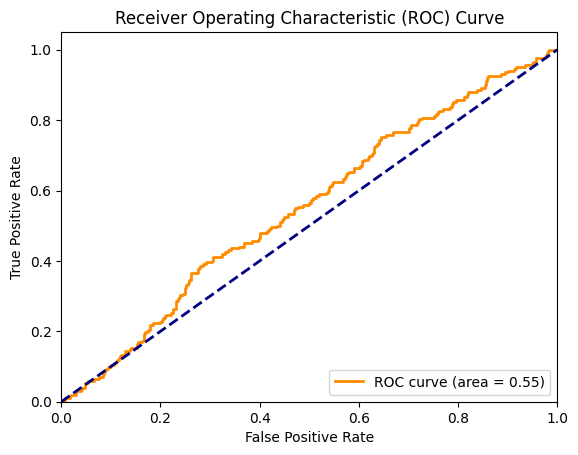

Predictions saved for SVM.


In [ ]:
# Model SVM

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import matplotlib.pyplot as plt


# Encoding categorical variables
categorical_columns = train_data.select_dtypes(include='object').columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])
    label_encoders[col] = le

# Splitting train data into features and target
X = train_data.drop(columns=['Default'])
y = train_data['Default']

# Splitting into train/validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test_data)

# Initialize SVM model
svm_model = SVC(random_state=42, probability=True)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Evaluate on validation set
y_val_pred_svm = svm_model.predict(X_val_scaled)
validation_accuracy_svm = accuracy_score(y_val, y_val_pred_svm)
print(f"Validation Accuracy for SVM: {validation_accuracy_svm:.2%}")
print(f"Classification Report for SVM:\n", classification_report(y_val, y_val_pred_svm))

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, svm_model.predict_proba(X_val_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Predictions for the test set
test_predictions_svm = svm_model.predict(X_test_scaled)

# Create a DataFrame with Customer_ID and Predictions
predictions_df_svm = pd.DataFrame({
    'Customer_ID': test_data_ids,
    'Prediction_Label': test_predictions_svm
})

# Save the predictions to a CSV file
predictions_df_svm.to_csv('svm_predictions.csv', index=False)

# Confirmation message
print("Predictions saved for SVM.")
